In [3]:
import numpy as np
import pandas as pd
from plotnine import *
import statistics

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

import plotly.graph_objects as go
import plotly.express as px

In [4]:
# Usaremos o dataset no qual mediremos o comprimento de um cateter (em cm) de acordo com a altura (em metros) do paciente
df = pd.DataFrame(data=[[1.087, 37], [1.613, 50], [0.953, 34], [1.003, 36], [1.156,43], [0.978, 28], [1.092, 37], [0.572, 20], [0.940, 34], [0.597, 30], [0.838, 38], [1.473, 47]], columns=['Altura', 'Comprimento'])

In [5]:
df

,Altura,Comprimento
0,1.087,37
1,1.613,50
2,0.953,34
3,1.003,36
4,1.156,43
5,0.978,28
6,1.092,37
7,0.572,20
8,0.940,34
9,0.597,30


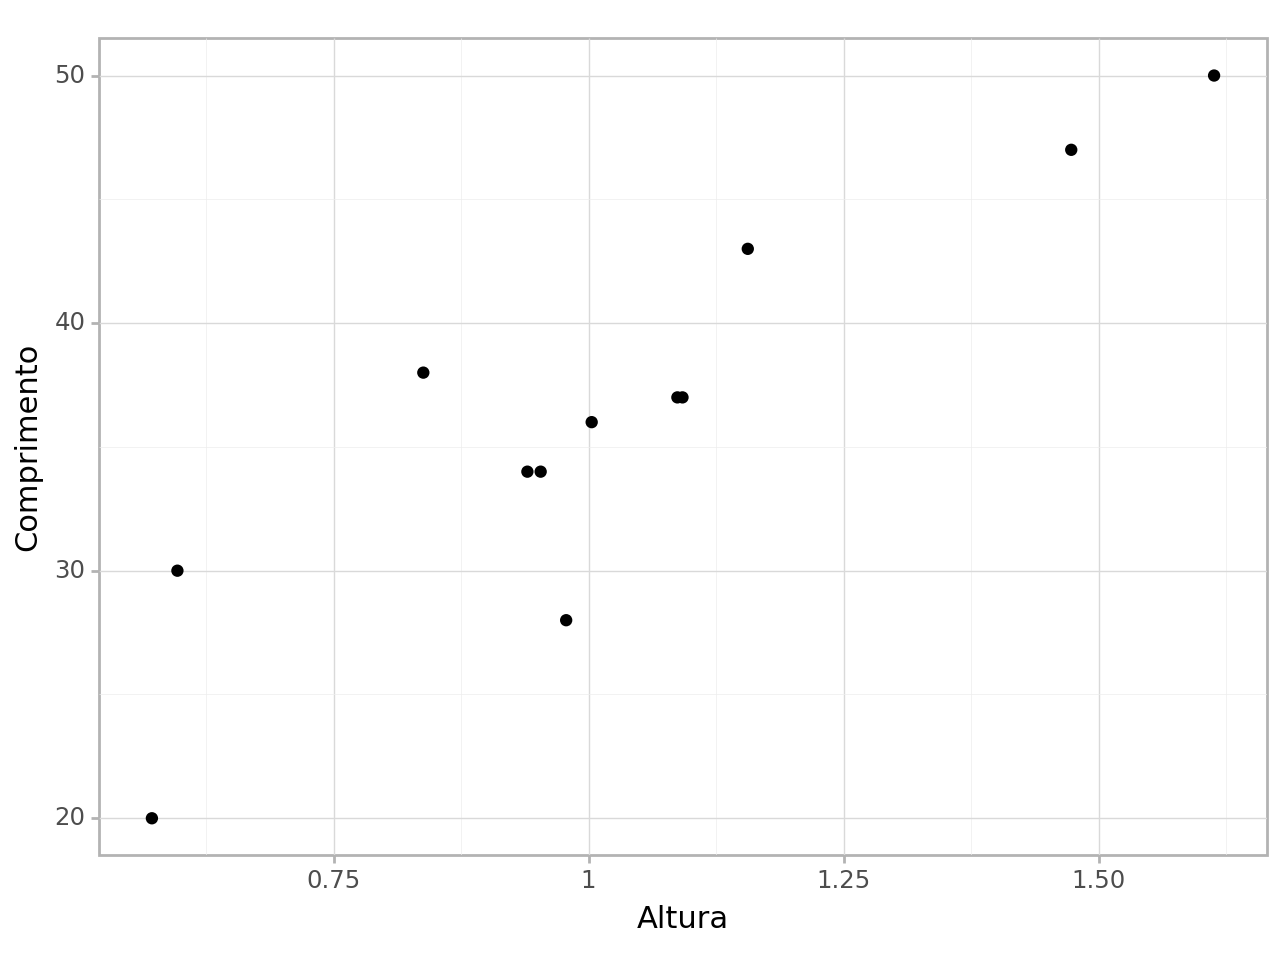

<Figure Size: (640 x 480)>

In [9]:
(ggplot(df, aes('Altura', 'Comprimento')) + geom_point() + theme_light())

In [11]:
df_shuffle = df.copy()